### crisp PCM の生成

1. $i < j$ について $a_{ij}$ を $[1/S, S]$ の中からランダムに選ぶ

    a. $-\ln 9$ から $\ln 9$ の一様分布に従う乱数 $\ln a_{ij}$ を生成

2. $i > j$ について $a_{ij} = 1 / a_{ji}$ とする

3. $\mathrm{CR}$ が $0.1$ より大きい場合は 1. に戻る

### 区間 PCM の生成

- $n$: 基準/代替案数
- $N = \left\{ 1, 2, \dots, n \right\}$
- $r_{\max}$: 区間 PCM $\bar{A}_k$ の各成分の幅を定めるときのパラメータ

crisp PCM $A = \left( a_{ij} \right)_{n \times n}$ を与える.

$\mathrm{DM}_k$ の区間 PCM $\bar{A}_k = \left( \bar{A}_{kij} \right)_{n \times n} = \left( \left[ \bar{a}_{kij}^\mathrm{L}, \bar{a}_{kij}^\mathrm{U} \right] \right)_{n \times n}$ を次のように与える.

1. $i < j$ の成分を次のように計算する.
    $$
    \begin{align*}
    \bar{a}_{kij}^\mathrm{L} & = a_{ij} \exp \left( -r_{kij}^\mathrm{L} \right), \\
    \bar{a}_{kij}^\mathrm{U} & = a_{ij} \exp \left( r_{kij}^\mathrm{U} \right).
    \end{align*}
    $$
    ただし, $r_{kij}^\mathrm{L}, r_{kij}^\mathrm{U} ~ (k \in \{ 1,2 \}, ~~ i, j \in N, ~ i < j)$ は $0$ から $r_{\max}$ の一様分布に従う.
    $S = 9$ ならば, $r_{\max}$ は $\frac{\ln 3}{2} \approx 0.55$ 程度にする.
    

2. $i > j$ の成分は $\bar{A}_{kij} = 1 / \bar{A}_{kji} = \left[ \frac{1}{\bar{a}_{kij}^\mathrm{U}}, \frac{1}{\bar{a}_{kij}^\mathrm{L}} \right]$ とする.

区間 PCM $\bar{A}$ の各成分を $1/S, \dots, 1/2, 1, 2, \dots, S$ にして区間 PCM $\left(  A_{ij} \right) = \left( \left[  a_{ij}^\mathrm{L}, a_{ij}^\mathrm{U} \right] \right)$ を得る.

$$
a_{ij}^\mathrm{L} = \begin{cases}
1/9 & \text{if} ~~ \bar{a}_{ij}^\mathrm{L} \leq 1 / \sqrt{9\cdot8}, \\
1/s & \text{if} ~~ 1/\sqrt{(s+1)s} < \bar{a}_{ij}^\mathrm{L} \leq 1/\sqrt{s(s-1)}, & s = 2, 3, \dots, 8, \\
1 & \text{if} ~~ 1/\sqrt{2} < \bar{a}_{ij}^\mathrm{L} \leq \sqrt{2}, \\
s & \text{if} ~~ \sqrt{(s-1)s} < \bar{a}_{ij}^\mathrm{L} \leq \sqrt{s(s+1)}, & s = 2, 3, \dots, 8, \\
9 & \text{if} ~~ \sqrt{8\cdot9} < \bar{a}_{ij}^\mathrm{L}.
\end{cases}
$$

$a_{ij}^\mathrm{U}$ も同様に計算する.

### 区間の類似度

ある比率の範囲を値とする区間 $A = \left[ a^\mathrm{L}, a^\mathrm{U} \right], B = \left[ b^\mathrm{L}, b^\mathrm{U} \right]$ の類似度 $\mathrm{Sim}\left( A, B \right)$ を次のように定める.

$$
\begin{align*}
    & \mathrm{Sim}\left( A, B \right) = \frac{\left| \bar{A} \cap \bar{B} \right|}{\left| \bar{A} \cup \bar{B} \right|}, \\
    & \text{where} ~~ \bar{A} = \left[ \ln a^\mathrm{L}, \ln a^\mathrm{U} \right], ~ \bar{B} = \left[ \ln b^\mathrm{L}, \ln b^\mathrm{U} \right]
\end{align*}
$$

### シミュレーション

1. 整合している crisp PCM $A_1, A_2$ を 1000 組生成する
2. crisp PCM 1 個に対して, 区間 PCM を 10 個生成する
3. 各区間 PCM について
    1. 手法 1 ~ 4 によって二重区間 PCM $\mathscr{A}^1, \mathscr{A}^2, \mathscr{A}^3, \mathscr{A}^4$ を計算
    2. 類似度を計算
        $$
        \mathrm{Sim}\left( A_{kij}, \mathscr{A}_{ij}^{l\pm} \right), ~~ i, j \in N, ~ i \neq j, ~ k \in \{ 1, 2 \}, ~ l \in \{ 1, 2, 3, 4 \}
        $$
    3. 類似度の集計
        $i,j$ 成分の算術平均, 二人の幾何平均をとる
            $$
            \sigma^{l\pm} = \sqrt{ \frac{1}{n(n-1)} \prod_{k \in \{ 1,2 \}} \sum_{i, j \in N, i \neq j} \mathrm{Sim}\left( A_{kij}, \mathscr{A}_{ij}^{l\pm} \right) }, ~~ l \in \{ 1, 2, 3, 4 \}
            $$
3. $\sigma^{l\pm}, ~ l \in \{ 1, 2, 3, 4 \}$ がそれぞれ 10000 個得られるので, その算術平均をとる

In [1]:
include("./crispPCM/index.jl")
include("./evaluation/index.jl")
include("./method1/index.jl")
include("./method2/index.jl")
include("./method3/index.jl")
include("./method4/index.jl")
include("./intervalPCM/index.jl")
include("./twofoldInterval/index.jl")
include("./twofoldIntervalPCM/index.jl")
include("./utils.jl")

discretizateIntoComparisonScale (generic function with 3 methods)

In [2]:
Random.seed!(100)

TaskLocalRNG()

In [3]:
S = 9.0
threshold = log(5) / 2

0.8047189562170501

In [4]:
SimulationCase = @NamedTuple{
    A₁::Matrix{Interval{T}},
    A₂::Matrix{Interval{T}}
} where {T <: Real}

function generateSimulationCases(
    n::Integer,
    numOfCrispPCM::Integer,
    intervalPCMsPerCrispPCM::Integer
)::Vector{SimulationCase}
    simulation_cases = SimulationCase[]

    for _ in 1:numOfCrispPCM
        # Generate a Crisp PCM
        crisp_pcm = generateConsistentCrispPCM(n, S)
        for _ in 1:intervalPCMsPerCrispPCM
            # Generate an Interval PCM for each Crisp PCM
            interval_pcm_1 = discretizateIntoComparisonScale(randamizedIntervalPCM(crisp_pcm, threshold), S)
            interval_pcm_2 = discretizateIntoComparisonScale(randamizedIntervalPCM(crisp_pcm, threshold), S)
            # Append the Crisp PCM and its corresponding Interval PCM as a tuple to the list
            push!(simulation_cases, (A₁=interval_pcm_1, A₂=interval_pcm_2))
        end
    end

    return simulation_cases
end

generateSimulationCases (generic function with 1 method)

In [5]:
SimulationResult = @NamedTuple{
    # 各 DM の与える区間 PCM
    A₁::Matrix{Interval{T}}, A₂::Matrix{Interval{T}},
    # method 1 ~ 4 の二重区間 PCM
    𝓐¹::Matrix{TwofoldInterval{T}}, 𝓐²::Matrix{TwofoldInterval{T}},
    𝓐³::Matrix{TwofoldInterval{T}}, 𝓐⁴::Matrix{TwofoldInterval{T}},
    # 𝓐ᵏ の二重区間の内側の区間
    𝓐¹⁻::Matrix{Interval{T}}, 𝓐²⁻::Matrix{Interval{T}},
    𝓐³⁻::Matrix{Interval{T}}, 𝓐⁴⁻::Matrix{Interval{T}},
    # 𝓐ᵏ の二重区間の外側の区間
    𝓐¹⁺::Matrix{Interval{T}}, 𝓐²⁺::Matrix{Interval{T}},
    𝓐³⁺::Matrix{Interval{T}}, 𝓐⁴⁺::Matrix{Interval{T}},
    # エラーメッセージ
    error::String
} where {T <: Real}

methodList = [method1, method2, method3, method4]

function runSimulation(
    case::SimulationCase{T}
    )::SimulationResult{T} where {T <: Real}
    𝓐 = Dict(); 𝓐⁻ = Dict(); 𝓐⁺ = Dict()
    
    try
        for k in 1:4
            𝓐[k] = methodList[k](case.A₁, case.A₂)
            𝓐⁻[k] = map(𝓐ᵢⱼ -> 𝓐ᵢⱼ[1], 𝓐[k])
            𝓐⁺[k] = map(𝓐ᵢⱼ -> 𝓐ᵢⱼ[2], 𝓐[k])
        end

        return (
            A₁=case.A₁, A₂=case.A₂,
            𝓐¹=𝓐[1], 𝓐²=𝓐[2], 𝓐³=𝓐[3], 𝓐⁴=𝓐[4],
            𝓐¹⁻=𝓐⁻[1], 𝓐²⁻=𝓐⁻[2], 𝓐³⁻=𝓐⁻[3], 𝓐⁴⁻=𝓐⁻[4],
            𝓐¹⁺=𝓐⁺[1], 𝓐²⁺=𝓐⁺[2], 𝓐³⁺=𝓐⁺[3], 𝓐⁴⁺=𝓐⁺[4],
            error=""
        )
    catch e
        n = size(case.A₁, 2)
        IPCM = fill(1..1, n, n)
        twofoldIPCM = fill((1..1, 1..1), n, n)
        return (
            A₁=case.A₁, A₂=case.A₂,
            𝓐¹=twofoldIPCM, 𝓐²=twofoldIPCM, 𝓐³=twofoldIPCM, 𝓐⁴=twofoldIPCM,
            𝓐¹⁻=IPCM, 𝓐²⁻=IPCM, 𝓐³⁻=IPCM, 𝓐⁴⁻=IPCM,
            𝓐¹⁺=IPCM, 𝓐²⁺=IPCM, 𝓐³⁺=IPCM, 𝓐⁴⁺=IPCM,
            error=string(e)
        )
    end
end

runSimulation (generic function with 1 method)

In [6]:
InnerConincidenceList = @NamedTuple{
    𝓐¹⁻::T, 𝓐¹⁺::T,
    𝓐²⁻::T, 𝓐²⁺::T,
    𝓐³⁻::T, 𝓐³⁺::T,
    𝓐⁴⁻::T, 𝓐⁴⁺::T
} where {T <: Real}

ConincidenceList = @NamedTuple{
    A₁::InnerConincidenceList{T},
    A₂::InnerConincidenceList{T},
    error::String
} where {T <: Real}

function calculateCoincidenceList(result::SimulationResult{T})::ConincidenceList{T} where {T <: Real}
    A₁ = result.A₁; A₂ = result.A₂
    𝓐¹⁻ = result.𝓐¹⁻; 𝓐¹⁺ = result.𝓐¹⁺
    𝓐²⁻ = result.𝓐²⁻; 𝓐²⁺ = result.𝓐²⁺
    𝓐³⁻ = result.𝓐³⁻; 𝓐³⁺ = result.𝓐³⁺
    𝓐⁴⁻ = result.𝓐⁴⁻; 𝓐⁴⁺ = result.𝓐⁴⁺
    try
        return (
            A₁=(
                𝓐¹⁻=logarithmicCoincidenceIndex(A₁, 𝓐¹⁻), 𝓐¹⁺=logarithmicCoincidenceIndex(A₁, 𝓐¹⁺),
                𝓐²⁻=logarithmicCoincidenceIndex(A₁, 𝓐²⁻), 𝓐²⁺=logarithmicCoincidenceIndex(A₁, 𝓐²⁺),
                𝓐³⁻=logarithmicCoincidenceIndex(A₁, 𝓐³⁻), 𝓐³⁺=logarithmicCoincidenceIndex(A₁, 𝓐³⁺),
                𝓐⁴⁻=logarithmicCoincidenceIndex(A₁, 𝓐⁴⁻), 𝓐⁴⁺=logarithmicCoincidenceIndex(A₁, 𝓐⁴⁺)
            ),
            A₂=(
                𝓐¹⁻=logarithmicCoincidenceIndex(A₂, 𝓐¹⁻), 𝓐¹⁺=logarithmicCoincidenceIndex(A₂, 𝓐¹⁺),
                𝓐²⁻=logarithmicCoincidenceIndex(A₂, 𝓐²⁻), 𝓐²⁺=logarithmicCoincidenceIndex(A₂, 𝓐²⁺),
                𝓐³⁻=logarithmicCoincidenceIndex(A₂, 𝓐³⁻), 𝓐³⁺=logarithmicCoincidenceIndex(A₂, 𝓐³⁺),
                𝓐⁴⁻=logarithmicCoincidenceIndex(A₂, 𝓐⁴⁻), 𝓐⁴⁺=logarithmicCoincidenceIndex(A₂, 𝓐⁴⁺)
            ),
            error=""
        )
    catch e
        return (
            A₁=(
                𝓐¹⁻=NaN, 𝓐¹⁺=NaN,
                𝓐²⁻=NaN, 𝓐²⁺=NaN,
                𝓐³⁻=NaN, 𝓐³⁺=NaN,
                𝓐⁴⁻=NaN, 𝓐⁴⁺=NaN
            ),
            A₂=(
                𝓐¹⁻=NaN, 𝓐¹⁺=NaN,
                𝓐²⁻=NaN, 𝓐²⁺=NaN,
                𝓐³⁻=NaN, 𝓐³⁺=NaN,
                𝓐⁴⁻=NaN, 𝓐⁴⁺=NaN
            ),
            error=string(e)
        )
    end
end

calculateCoincidenceList (generic function with 1 method)

In [22]:
function total(conincidenceLists::Vector{ConincidenceList{T}}) where {T <: Real}
    if length(conincidenceLists) == 0
        throw(ArgumentError("Empty list of ConincidenceLists"))
    end

    list_σ¹⁻ = []; list_σ¹⁺ = []
    list_σ²⁻ = []; list_σ²⁺ = []
    list_σ³⁻ = []; list_σ³⁺ = []
    list_σ⁴⁻ = []; list_σ⁴⁺ = []

    count = 0

    for list in conincidenceLists
        if list.error != "" continue end

        push!(list_σ¹⁻, sqrt(list.A₁.𝓐¹⁻ * list.A₂.𝓐¹⁻))
        push!(list_σ¹⁺, sqrt(list.A₁.𝓐¹⁺ * list.A₂.𝓐¹⁺))
        push!(list_σ²⁻, sqrt(list.A₁.𝓐²⁻ * list.A₂.𝓐²⁻))
        push!(list_σ²⁺, sqrt(list.A₁.𝓐²⁺ * list.A₂.𝓐²⁺))
        push!(list_σ³⁻, sqrt(list.A₁.𝓐³⁻ * list.A₂.𝓐³⁻))
        push!(list_σ³⁺, sqrt(list.A₁.𝓐³⁺ * list.A₂.𝓐³⁺))
        push!(list_σ⁴⁻, sqrt(list.A₁.𝓐⁴⁻ * list.A₂.𝓐⁴⁻))
        push!(list_σ⁴⁺, sqrt(list.A₁.𝓐⁴⁺ * list.A₂.𝓐⁴⁺))
    end
    count *= 2

    return [
        list_σ¹⁻,
        list_σ²⁻,
        list_σ³⁻,
        list_σ⁴⁻,
        list_σ¹⁺,
        list_σ²⁺,
        list_σ³⁺,
        list_σ⁴⁺
    ]
end

total (generic function with 1 method)

In [23]:
function run(
    n::Integer, 
    numOfCrispPCM::Integer, 
    intervalPCMsPerCrispPCM::Integer
    )
    cases = generateSimulationCases(n, numOfCrispPCM, intervalPCMsPerCrispPCM)
    results = Vector{SimulationResult}(undef, length(cases))
    Threads.@threads for i in 1:length(cases)
        results[i] = runSimulation(cases[i])
    end
    conincidenceList = calculateCoincidenceList.(results)
    return total(conincidenceList)
end

run (generic function with 1 method)

In [24]:
r4 = run(4, 1000, 100)
r5 = run(5, 1000, 100)
r6 = run(6, 1000, 100)
r7 = run(7, 1000, 100)

8-element Vector{Vector{Any}}:
 [0.0, 0.0, 0.0, 0.0, 4.04493679264329e-18, 0.0, 1.379107749046453e-17, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.00333585516972116, 0.0, 0.0, 0.0, 6.425874502147881e-18, 0.0, 0.0, 0.0]
 [6.304264560647501e-17, 3.2570131401875856e-9, 6.268367123453374e-17, 0.04761904761904766, 7.907378302470562e-17, 2.1273273218040154e-17, 1.086353186770643e-9, 1.230450440599284e-9, 8.275586686613101e-17, 4.660092002863014e-17  …  0.04761904761904763, 1.11249386199304e-9, 8.765680764684246e-17, 6.370809912564477e-17, 1.147154098940792e-16, 1.951717493797241e-9, 3.2908755172625265e-17, 1.496259481183482e-9, 7.252468603433904e-17, 5.1905256120992386e-17]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
 [0.3298889304009698, 0.34264170205969274, 0.32057096939877894, 0.2794584100173039, 0.3313720593371276, 0.3267596267183999, 0.3

In [73]:
using Plots
using StatsPlots
using LaTeXStrings
pyplot()

Plots.PyPlotBackend()

In [129]:
function displayHistgram(result, y_max_inner, y_max_outer)
    list_p = []
    for i in eachindex(result)
        if i <= 4
            p = histogram(
                result[i],
                bins=range(0, stop=1, length=21),
                legend=false,
                xlims=(-0.1, 1),
                ylims=(0, y_max_inner),
                title=L"\sigma^{%$(i)-}"
            )
            push!(list_p, p)
        else
            p = histogram(
                result[i],
                bins=range(0, stop=1, length=21),
                legend=false,
                xlims=(-0.1, 1),
                ylims=(0, y_max_outer),
                title=L"\sigma^{%$(i-4)+}"
            )
            push!(list_p, p)
        end
    end
    display(plot(list_p..., layout=(2, 4), size=(1600, 800)))
end

displayHistgram (generic function with 2 methods)

In [130]:
function displayBoxplot(result)
    list_p = []
    for i in eachindex(result)
        method_name = i <= 4 ? L"\sigma^{%$(i)-}" : L"\sigma^{%$(i-4)+}"
        p = boxplot(
            result[i],
            legend=false,
            xlims=(-0.1, 1),
            orientation=:horizontal,
            whisker_range=0,
            yticks=[],
            title=method_name
        )
        push!(list_p, p)
    end
    display(plot(list_p..., layout=(2, 4), size=(1600, 300)))
end

displayBoxplot (generic function with 1 method)

---
# $n = 4$

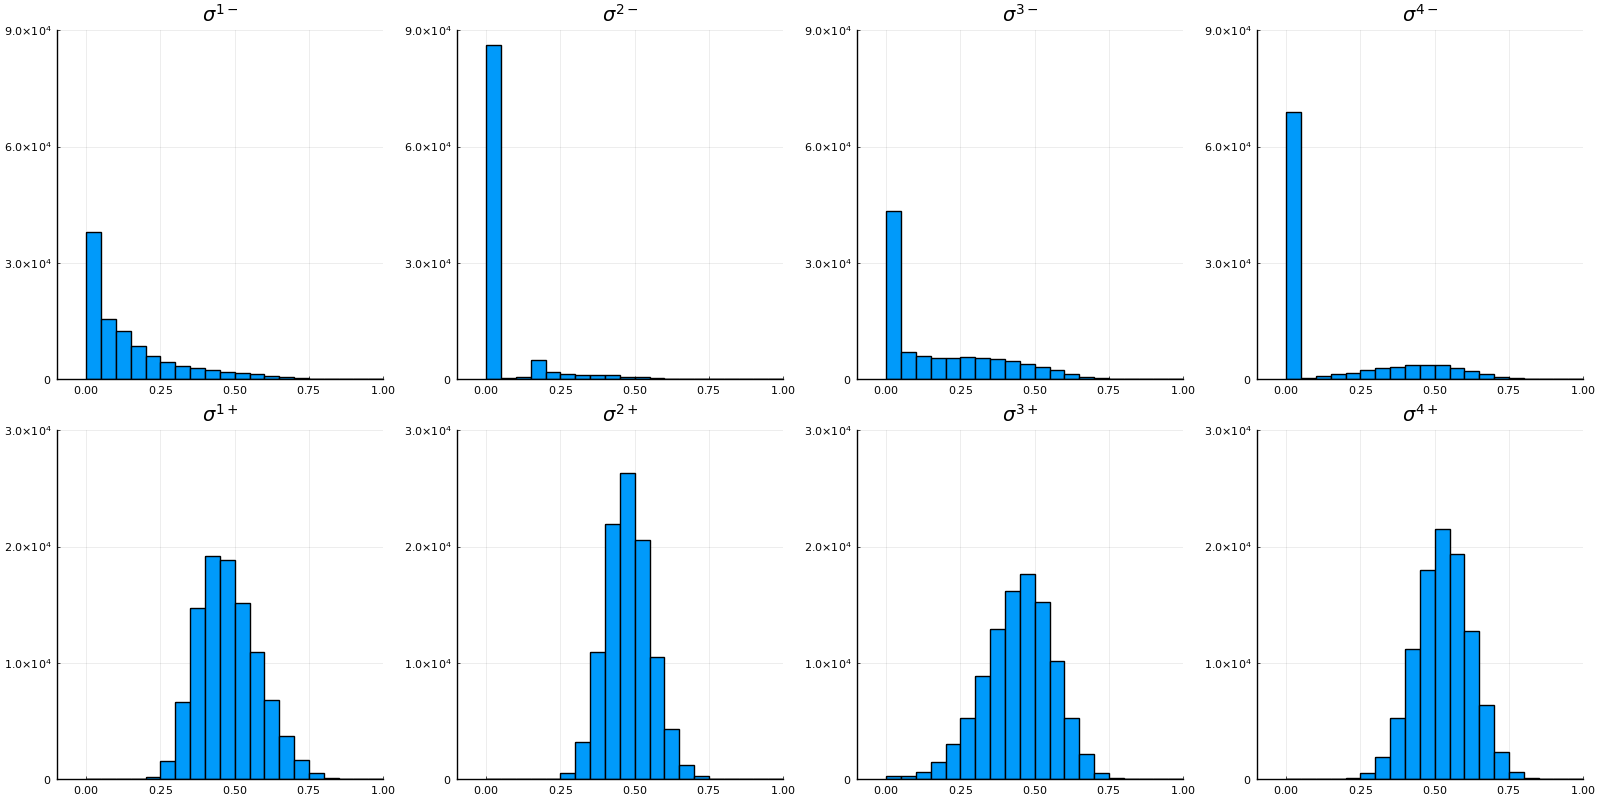

In [135]:
displayHistgram(r4, 9e4, 3e4)

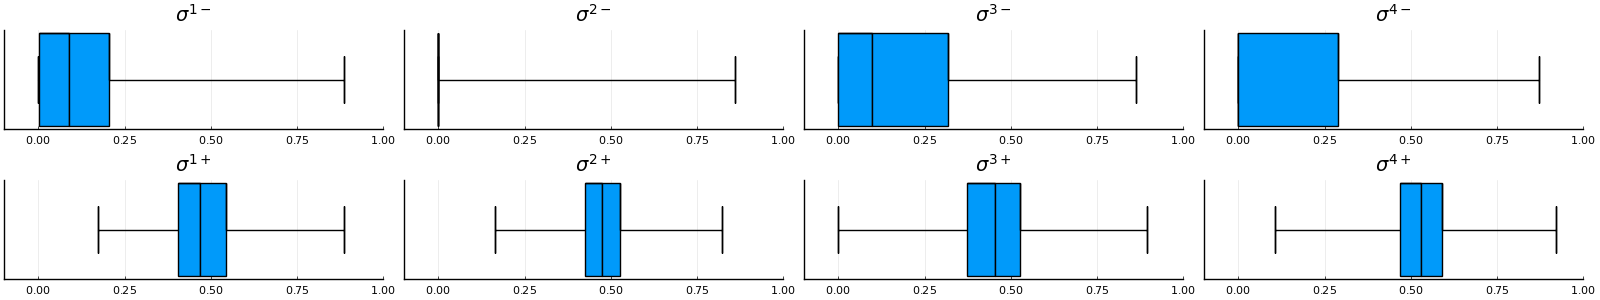

In [136]:
displayBoxplot(r4)

---
# $n = 5$

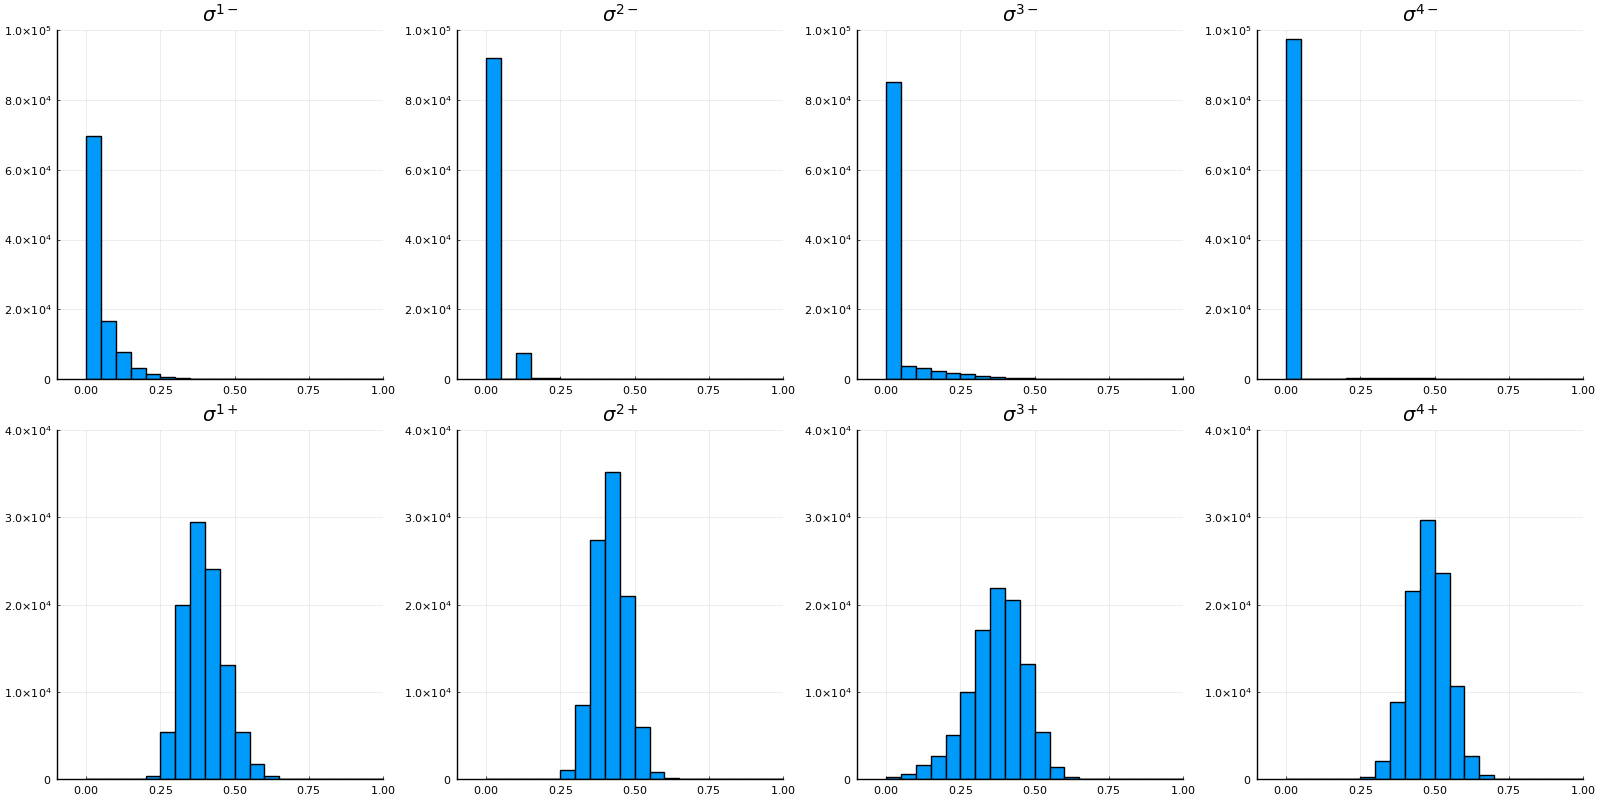

In [137]:
displayHistgram(r5, 1e5, 4e4)

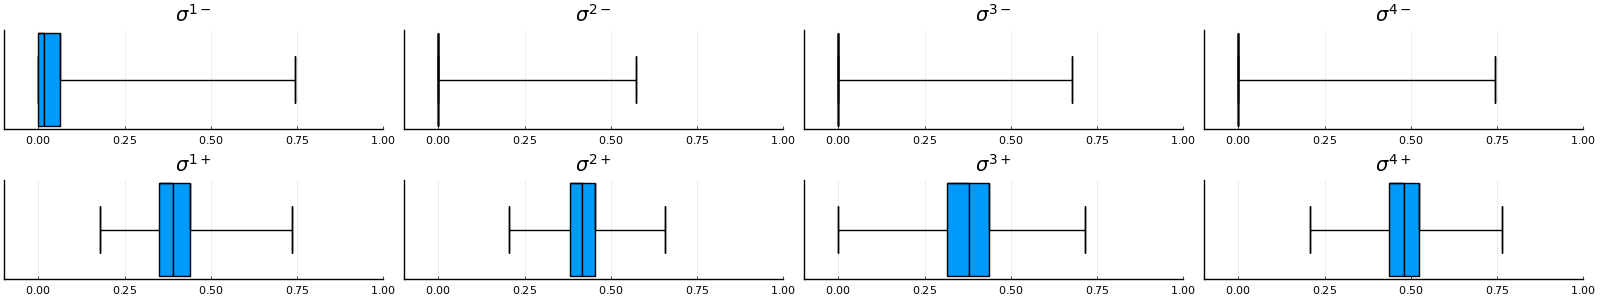

In [138]:
displayBoxplot(r5)

---
# $n = 6$

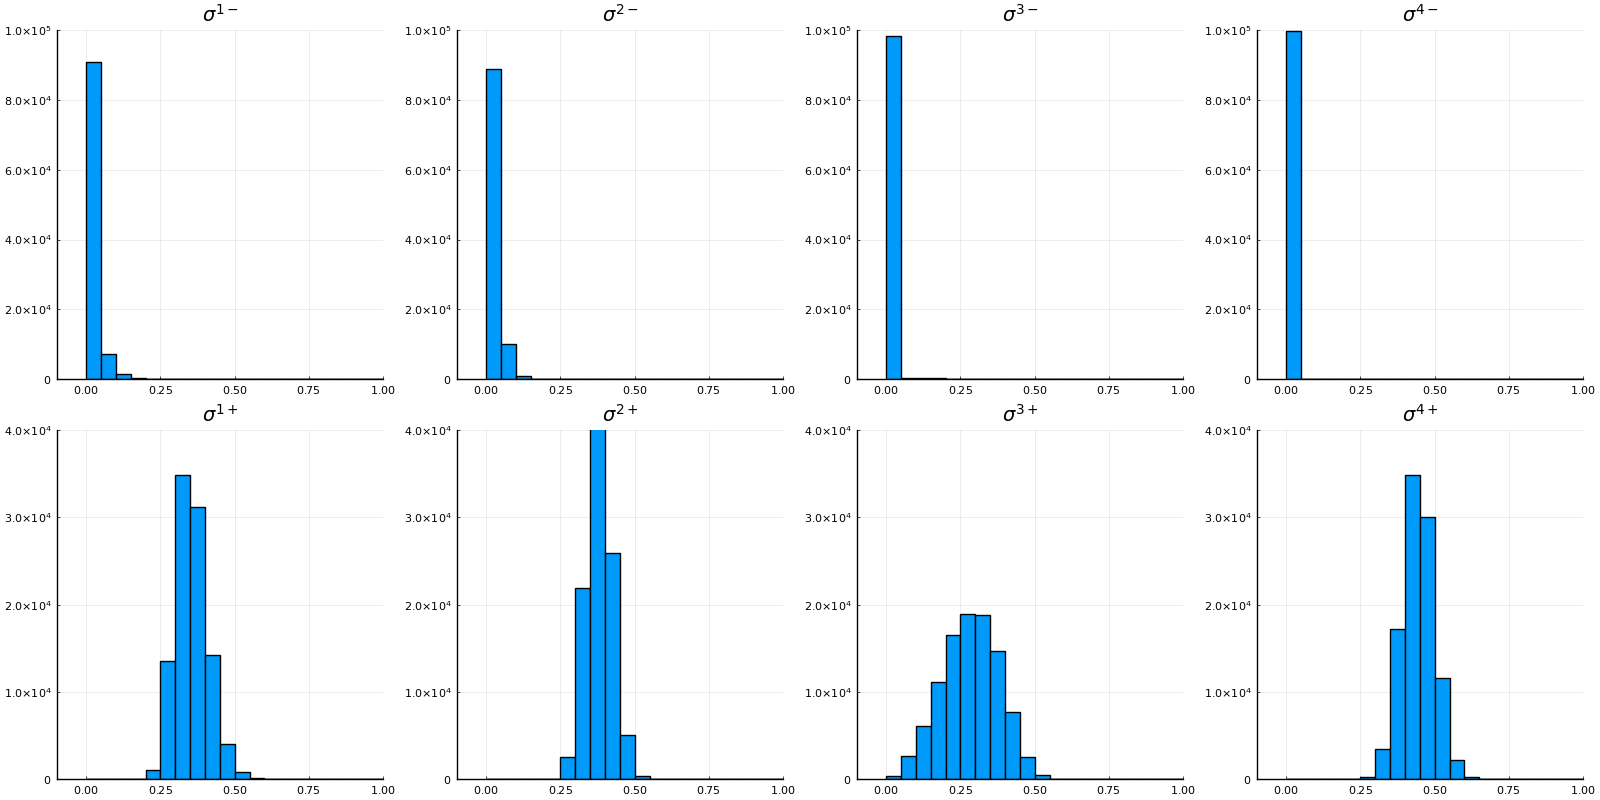

In [139]:
displayHistgram(r6, 1e5, 4e4)

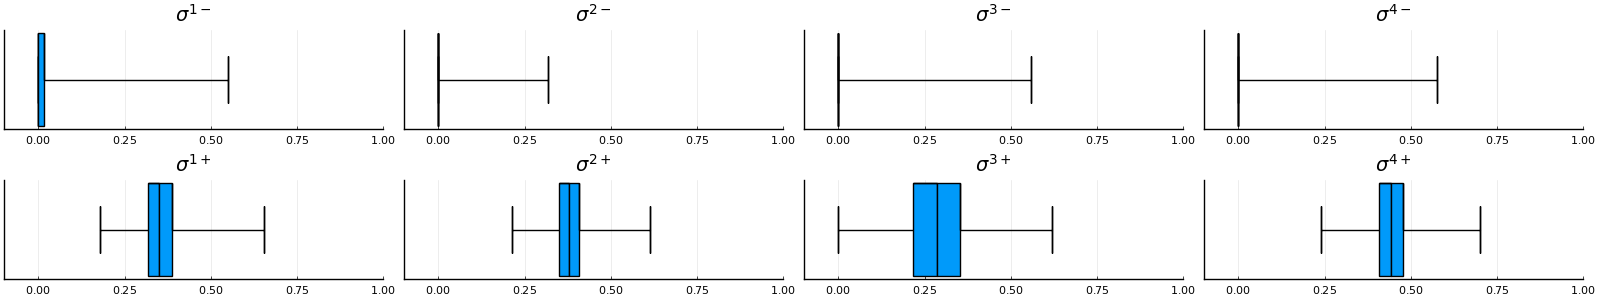

In [140]:
displayBoxplot(r6)

---
# $n = 7$

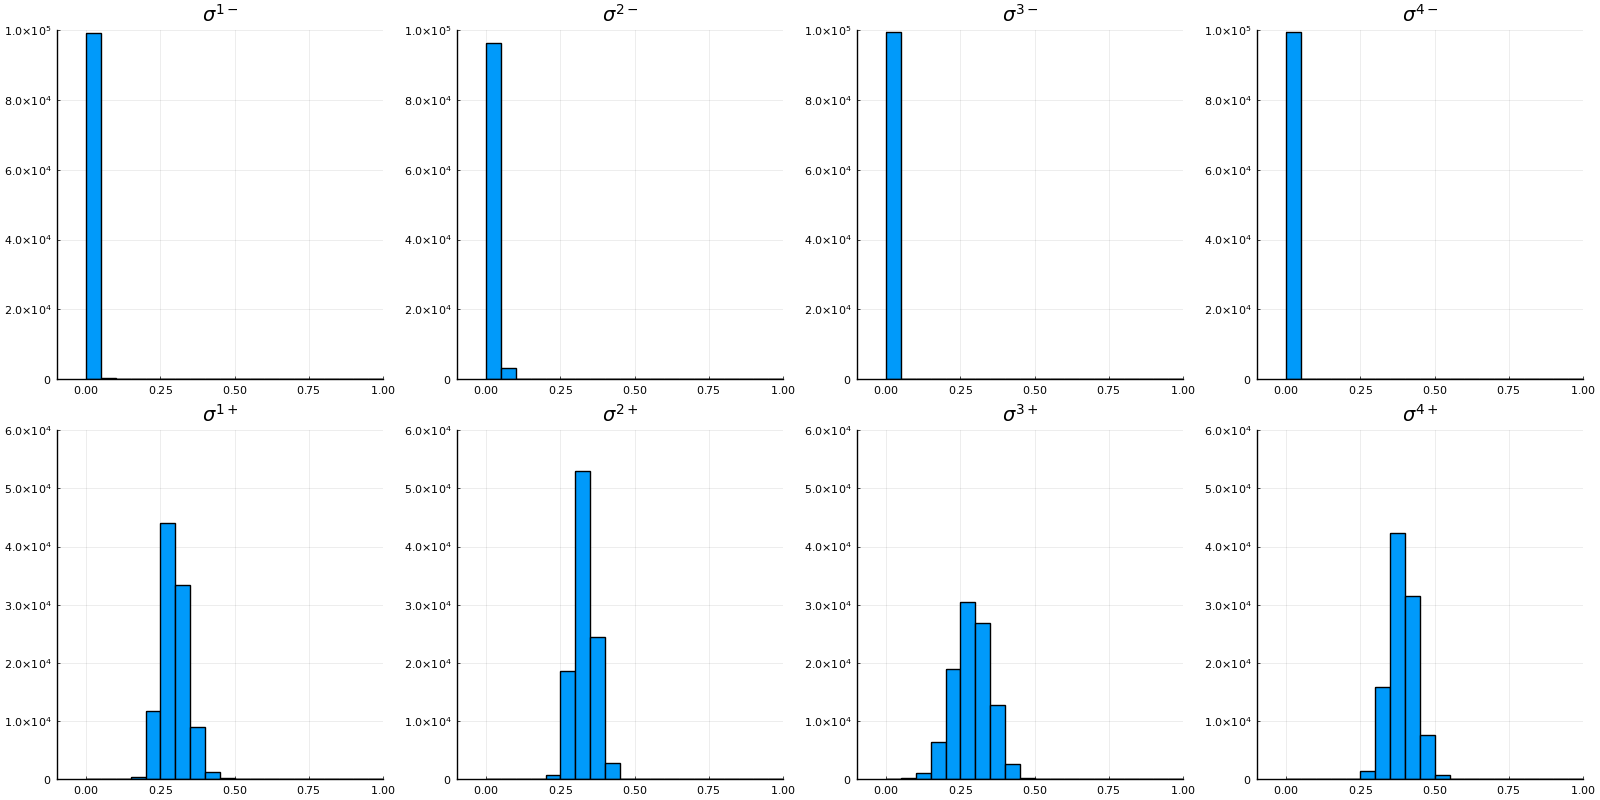

In [141]:
displayHistgram(r7, 1e5, 6e4)

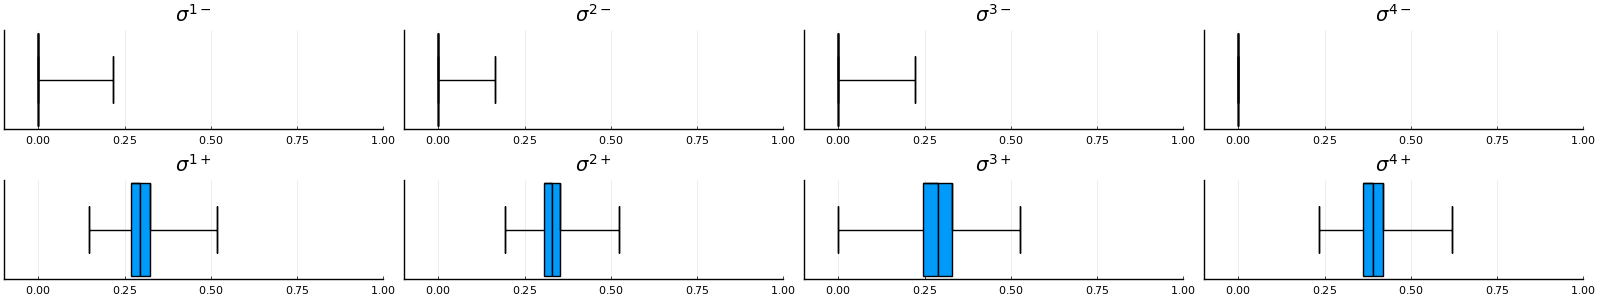

In [142]:
displayBoxplot(r7)